# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
# Importação dos dados
link = "https://raw.githubusercontent.com/gfsilveira/ebac/main/"
link += "03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo_09/SINASC_RO_2019.csv"
df = pd.read_csv(link)
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
# Verificando o nome das colunas
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

## 1. Idade media das mães e dos pais por município (coluna munResNome)


In [4]:
# Copiando a DataFrame original para uma contendo apenas as colunas de interesse
df_copy = df[["munResNome","IDADEMAE","IDADEPAI"]].copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   munResNome  27028 non-null  object 
 1   IDADEMAE    27028 non-null  int64  
 2   IDADEPAI    7607 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 633.6+ KB


In [5]:
'''
Como é possível verificar no info(), temos nome de pais faltando.
Vamos verificar como fica a média, retirando esses dados
'''
df_copy = df_copy.dropna()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7607 entries, 0 to 27026
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   munResNome  7607 non-null   object 
 1   IDADEMAE    7607 non-null   int64  
 2   IDADEPAI    7607 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 237.7+ KB


In [6]:
# Agrupando os dados de média de idade por município
df_copy_mean = df_copy.groupby("munResNome").mean()
df_copy_mean.head()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.892857,29.548701
Alto Alegre dos Parecis,24.679104,29.179104
Alto Paraíso,22.833333,28.833333
Alvorada D'Oeste,26.825243,30.757282
Ariquemes,28.133333,32.466667


<Axes: title={'center': 'Média das idade de Mães e Pais, por Município, removendo dados faltantes.'}, xlabel='Municípios', ylabel='Média'>

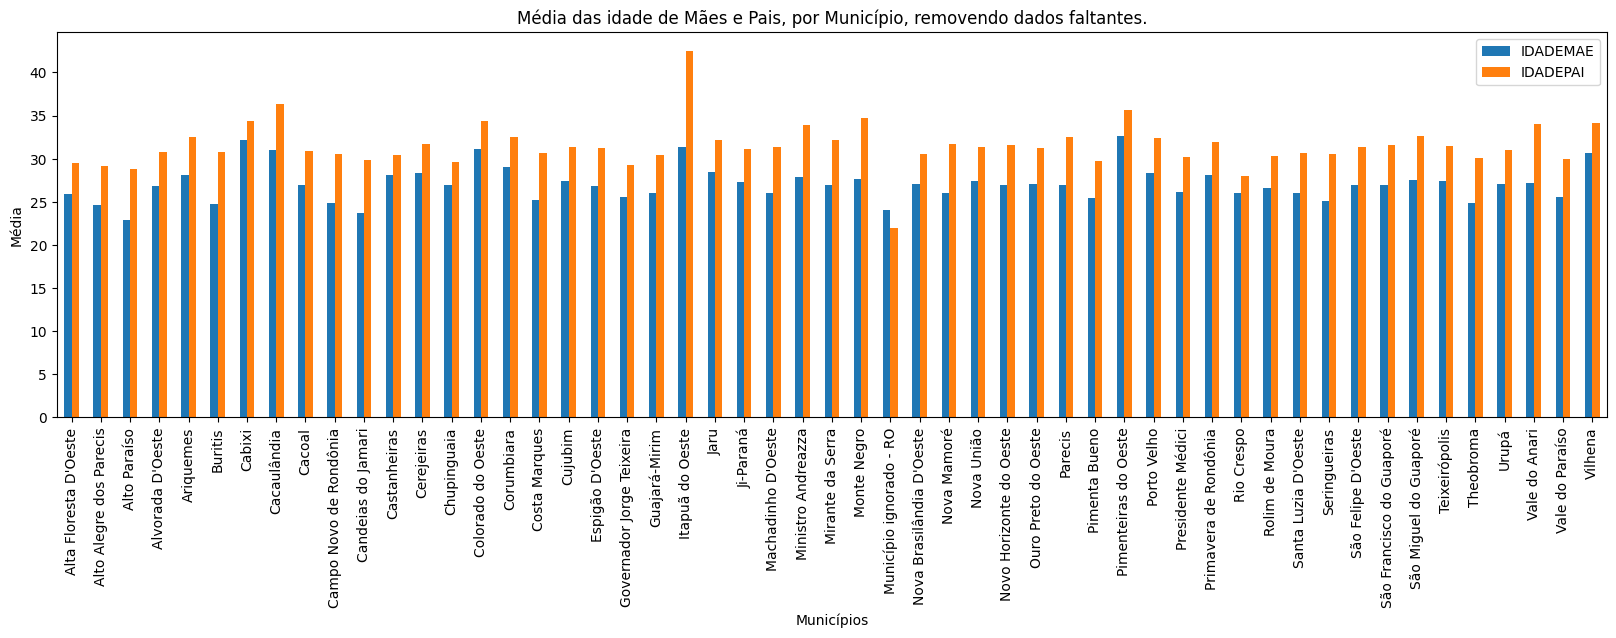

In [7]:
# Plotando os dados de médias
df_copy_mean.plot.bar(
    title="Média das idade de Mães e Pais, por Município, removendo dados faltantes.",
    xlabel="Municípios",
    ylabel="Média",
    figsize=(20,5)
)

In [8]:
# Verificando o município com as maiores diferensas de médias
df_copy_mean.loc["Itapuã do Oeste"]

IDADEMAE    31.375
IDADEPAI    42.500
Name: Itapuã do Oeste, dtype: float64

In [9]:
# Em Itapuã do Oeste existe um pai com 73, o que pode deslocar a média
df_copy[df_copy['munResNome'] == "Itapuã do Oeste"]['IDADEPAI'].value_counts()

36.0    2
44.0    1
41.0    1
39.0    1
73.0    1
25.0    1
46.0    1
Name: IDADEPAI, dtype: int64

In [10]:
# Analisando o número de nascimentos no município onde as mães são mais velha que os pais
df_copy[df_copy['munResNome'] == "Município ignorado - RO"].value_counts()

munResNome               IDADEMAE  IDADEPAI
Município ignorado - RO  24        22.0        1
dtype: int64

In [11]:
# Verificando a relação entre as médias
df_copy_mean['comparaMaePaiIdade'] = df_copy_mean['IDADEMAE'] < df_copy_mean['IDADEPAI']
print(f"Número de municípios onde a média de idade das mães é superior ao dos pais: {len(df_copy_mean) - df_copy_mean['comparaMaePaiIdade'].sum()}")
print(f"Total de municípios agrupado: {len(df_copy_mean)}")
print(f"Total de municípios original: {len(df['munResNome'].unique())}")

Número de municípios onde a média de idade das mães é superior ao dos pais: 1
Total de municípios agrupado: 53
Total de municípios original: 53


In [12]:
# Médias gerais
print(f"Média das idades das mães: {df_copy_mean['IDADEMAE'].mean():.2f} anos")
print(f"Média das idades dos pais: {df_copy_mean['IDADEPAI'].mean():.2f} anos")

Média das idades das mães: 27.10 anos
Média das idades dos pais: 31.50 anos


<Axes: title={'center': 'Média das idade de Mães e Pais, por Município, removendo dados faltantes.'}, xlabel='Municípios', ylabel='Médias'>

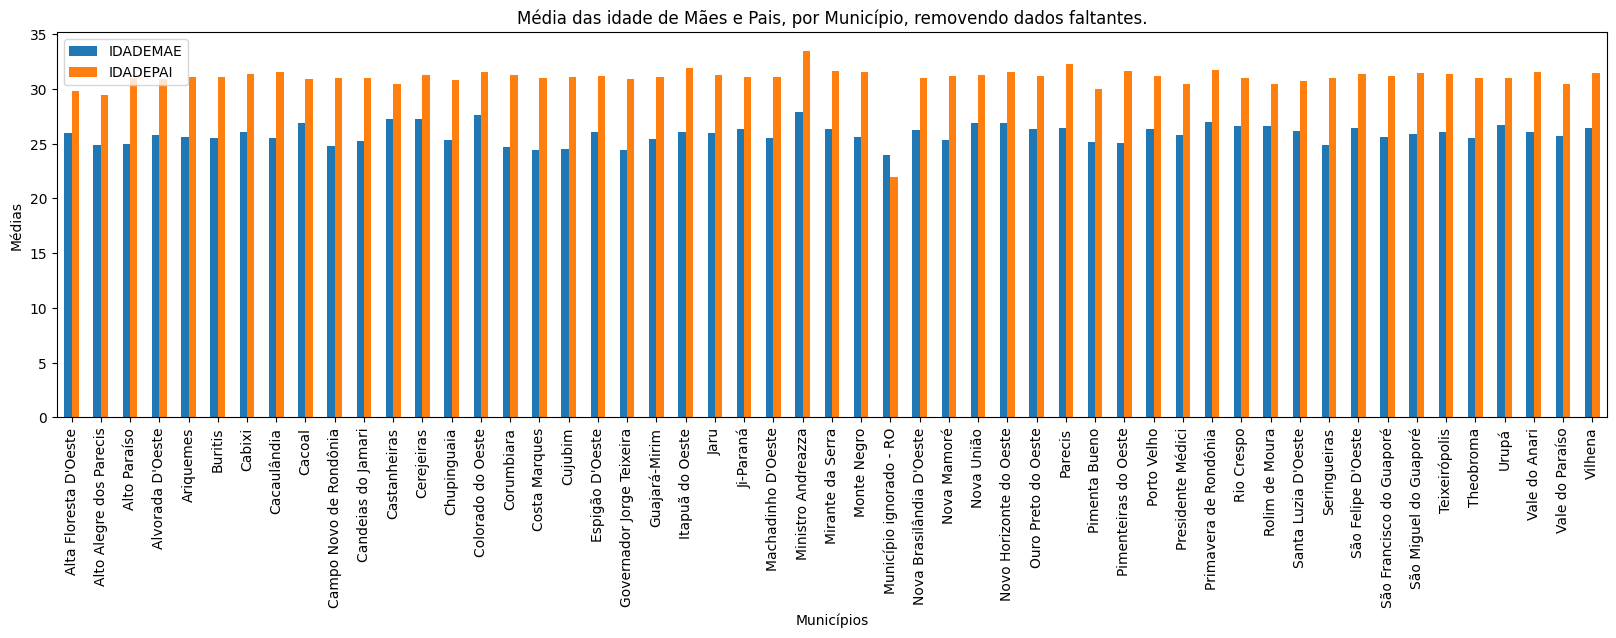

In [13]:
'''
Repetindo as análises anteriores, porém agora completando os dados faltantes
com a média dos demais dados.
'''
df_copy = df[["munResNome","IDADEMAE","IDADEPAI"]].copy()
df_copy.fillna(df['IDADEPAI'].mean(), inplace=True)
df_copy_mean = df_copy.groupby("munResNome").mean()
df_copy_mean.plot.bar(
    title="Média das idade de Mães e Pais, por Município, removendo dados faltantes.",
    xlabel="Municípios",
    ylabel="Médias",
    figsize=(20,5)
)

In [14]:
# Verificando o município com as maiores diferensas de médias
df_copy_mean.loc["Itapuã do Oeste"]

IDADEMAE    26.064220
IDADEPAI    31.929669
Name: Itapuã do Oeste, dtype: float64

In [15]:
# Verificando a relação entre as médias
df_copy_mean['comparaMaePaiIdade'] = df_copy_mean['IDADEMAE'] < df_copy_mean['IDADEPAI']
print(f"Número de municípios onde a média de idade das mães é superior ao dos pais: {len(df_copy_mean) - df_copy_mean['comparaMaePaiIdade'].sum()}")
print(f"Total de municípios agrupado: {len(df_copy_mean)}")
print(f"Total de municípios original: {len(df['munResNome'].unique())}")

Número de municípios onde a média de idade das mães é superior ao dos pais: 1
Total de municípios agrupado: 53
Total de municípios original: 53


In [16]:
# Médias gerais
print(f"Média das idades das mães: {df_copy_mean['IDADEMAE'].mean():.2f} anos")
print(f"Média das idades dos pais: {df_copy_mean['IDADEPAI'].mean():.2f} anos")

Média das idades das mães: 25.90 anos
Média das idades dos pais: 30.97 anos


### Conclusão
<br>
A grande maioria das instâncias não tem dados de idade dos pais. São 27.028 dados, com apenas 7.607 (28%) idades de pais.<br>

No banco de dados existem 53 municípios. As idades médias das mães (25 anos) são menores que as dos pais (30 anos) em quase todos os municípios, com exceção de apenas um deles, onde não temos registro de nome do município, apenas do estado de Rondônia, e que ocorreu apenas 1 nascimento.<br>

A retirada dos dados faltantes ou a substituição desses pelas médias, parece ter o mesmo efeito. Apenas no município de Itapoã do Oeste, isso parace modificar o dados.



---



## 2 Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [17]:
# Selecionando as colunas de interesse
colunas = ['SEXO','PESO','DTNASC','ESCMAE']
df_copy = df[colunas].copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SEXO    27024 non-null  object
 1   PESO    27028 non-null  int64 
 2   DTNASC  27028 non-null  object
 3   ESCMAE  26716 non-null  object
dtypes: int64(1), object(3)
memory usage: 844.8+ KB


In [18]:
# Selecionando instâncias de nascimento no dia do meu aniversário
filtro = df_copy[colunas[2]].apply(lambda i: "06-16" in i).values
df_copy_nasc = df_copy[filtro]
df_copy_nasc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 1211 to 12461
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SEXO    48 non-null     object
 1   PESO    48 non-null     int64 
 2   DTNASC  48 non-null     object
 3   ESCMAE  48 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.9+ KB


In [19]:
# Agrupando o peso médio dos bebes por sexo e escolaridade da mãe
df_copy_nasc.groupby(["SEXO","ESCMAE"])['PESO'].mean().to_frame().round(2)

PESO
SEXO      ESCMAE                  
Feminino  12 anos ou mais  2647.00
          4 a 7 anos       3519.17
          8 a 11 anos      3328.57
Masculino 12 anos ou mais  3002.50
          4 a 7 anos       3289.56
          8 a 11 anos      3198.60

In [20]:
# Editando a DataFrame obtida, para remover o index
df_copy_nasc_destr = df_copy_nasc.groupby(["SEXO","ESCMAE"])['PESO'].mean().to_frame().round(2)["PESO"].reset_index().copy()
df_copy_nasc_destr

,SEXO,ESCMAE,PESO
0,Feminino,12 anos ou mais,2647.00
1,Feminino,4 a 7 anos,3519.17
2,Feminino,8 a 11 anos,3328.57
3,Masculino,12 anos ou mais,3002.50
4,Masculino,4 a 7 anos,3289.56
5,Masculino,8 a 11 anos,3198.60


In [21]:
# Verificando o peso médio dos bebes por sexo
print(f"Peso médio dos bebes femininos: {round(df_copy_nasc_destr[df_copy_nasc_destr['SEXO'] == 'Feminino']['PESO'].mean(), 2)}")
print(f"Peso médio dos bebes masculinos: {round(df_copy_nasc_destr[df_copy_nasc_destr['SEXO'] != 'Feminino']['PESO'].mean(), 2)}")

Peso médio dos bebes femininos: 3164.91
Peso médio dos bebes masculinos: 3163.55


In [22]:
print(f"Peso médio dos bebes com escolaridade da mãe de 12 anos ou mais: {df_copy_nasc_destr[df_copy_nasc_destr['ESCMAE'] == '12 anos ou mais']['PESO'].mean()}")
print(f"Peso médio dos bebes com escolaridade da mãe de 4 a 7 anos: {df_copy_nasc_destr[df_copy_nasc_destr['ESCMAE'] == '4 a 7 anos']['PESO'].mean()}")
print(f"Peso médio dos bebes com escolaridade da mãe de 8 a 11 anos: {df_copy_nasc_destr[df_copy_nasc_destr['ESCMAE'] == '8 a 11 anos']['PESO'].mean()}")

Peso médio dos bebes com escolaridade da mãe de 12 anos ou mais: 2824.75
Peso médio dos bebes com escolaridade da mãe de 4 a 7 anos: 3404.365
Peso médio dos bebes com escolaridade da mãe de 8 a 11 anos: 3263.585


In [23]:
'''
Os dados mostram que os pesos médios dos bebes parecem ser mais influenciados
pela escolaridade da mãe do que pelo sexo.

Como maior escolaridade pode indicar maior idade da mãe e, sabe-se que a idade
da mãe pode influênciar no peso do bebe, decidiu-se analisar mais essa variável.
'''
colunas.append("IDADEMAE")

df_copy = df[colunas].copy()
filtro = df_copy[colunas[2]].apply(lambda i: "06-16" in i).values
df_copy_nasc = df_copy[filtro]
df_copy_nasc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 1211 to 12461
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SEXO      48 non-null     object
 1   PESO      48 non-null     int64 
 2   DTNASC    48 non-null     object
 3   ESCMAE    48 non-null     object
 4   IDADEMAE  48 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [24]:
# Médias de peso do bebe e idade da mãe, por sexo do bebe e escolaridade da mãe.
df_copy_nasc.groupby(["SEXO","ESCMAE"])[['PESO','IDADEMAE']].mean().round(2)

PESO  IDADEMAE
SEXO      ESCMAE                            
Feminino  12 anos ou mais  2647.00     32.00
          4 a 7 anos       3519.17     29.17
          8 a 11 anos      3328.57     27.07
Masculino 12 anos ou mais  3002.50     32.75
          4 a 7 anos       3289.56     21.89
          8 a 11 anos      3198.60     27.10

### Conclusão

<br>
Os dados mostram que a relação do peso do bebe é inversa a escolaridade em anos da mãe. Maiores escolaridades, menores pesos, sendo o contrário verdadeiro. Além disso, em média, mães com maiores escolaridades são mais velhas e têm filhos menos pesados.<br>
Parece não haver diferença entre bebes femininos e masculinos.  



---



## 3 Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [25]:
# Analisando o número de nascimentos por município
df['munResNome'].value_counts().tail()

Parecis                    44
Primavera de Rondônia      43
Pimenteiras do Oeste       40
Castanheiras               32
Município ignorado - RO     1
Name: munResNome, dtype: int64

In [26]:
'''
Utilizou-se o segundo município com menos nascimentos, pois o primeiro teve
apenas 1 nascimento e portanto não poderemos analisar medidas resumo
'''
mun_menos_nasc = df['munResNome'].value_counts().tail().index[-2]
mun_menos_nasc

'Castanheiras'

In [27]:
# Analisando as medidas resumo na base de dados completa
selec = {
    'IDADEMAE': ("mean", "max", "min"),
    'IDADEPAI': ("mean", "max", "min")
}
df.agg(selec).round(2).T

,mean,max,min
IDADEMAE,26.09,53.0,11.0
IDADEPAI,31.09,86.0,15.0


In [28]:
# Analisando as medidas resumo na cidade com menos nascimentos
df_copy = df[df['munResNome'] == mun_menos_nasc].copy()
df_copy.agg(selec).round(2).T

,mean,max,min
IDADEMAE,27.28,39.0,17.0
IDADEPAI,30.39,43.0,17.0


### Conclusão
<br>
Uma instância da base de dados não comtêm o nome do município, sendo que seria apenas um nascimento. Decidiu-se pegar o segundo menor município, Castanheiras.<br>
Observa-se que a média de idade da mãe e do pai difere pouco da base de dados completa da cidade com menos nascimentos. Já a amplitude (mínimo e máximo) parece ser discrepânte, sendo que a cidade apresenta menor variação.



---



## 4 Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [29]:
# Selecionando as colunas de interesse para obter os nascimentos de março
colunas = ["DTNASC","QTDFILVIVO","IDADEMAE","IDADEPAI","munResNome"]
filtro = df[colunas[0]].apply(lambda i: "-03-" in i)

# Verifica se o filtro está correto, retornando apenas nascimentos em março.
df[filtro][colunas[0]].unique()

array(['2019-03-20', '2019-03-23', '2019-03-27', '2019-03-11',
       '2019-03-12', '2019-03-18', '2019-03-28', '2019-03-19',
       '2019-03-26', '2019-03-07', '2019-03-29', '2019-03-01',
       '2019-03-02', '2019-03-03', '2019-03-13', '2019-03-14',
       '2019-03-15', '2019-03-16', '2019-03-21', '2019-03-25',
       '2019-03-31', '2019-03-04', '2019-03-06', '2019-03-05',
       '2019-03-08', '2019-03-09', '2019-03-10', '2019-03-22',
       '2019-03-24', '2019-03-17', '2019-03-30'], dtype=object)

In [30]:
# Obtendo cópia da DataFrame original, com o filtro anterior
df_copy = df[filtro][colunas].copy()
df_copy.head()

,DTNASC,QTDFILVIVO,IDADEMAE,IDADEPAI,munResNome
3,2019-03-20,0.0,30,24.0,Alto Alegre dos Parecis
4,2019-03-23,1.0,30,27.0,Alta Floresta D'Oeste
5,2019-03-27,2.0,33,40.0,Alta Floresta D'Oeste
9,2019-03-11,1.0,30,41.0,Alta Floresta D'Oeste
10,2019-03-11,1.0,31,28.0,Alta Floresta D'Oeste


In [31]:
# Verificando em qual município coorreu mais nascimentos em março
mun_max_nac = df_copy[colunas[-1]].value_counts().index[0]
print(f"Município onde nasceu mais bebes no mês de março: {mun_max_nac}")

Município onde nasceu mais bebes no mês de março: Porto Velho


In [32]:
# Seleciona apenas bebes nascidos no mês de março na cidade onde nasceram mais bebes
df_copy_mun = df_copy[df_copy[colunas[-1]] == mun_max_nac]
df_copy_mun.head()

,DTNASC,QTDFILVIVO,IDADEMAE,IDADEPAI,munResNome
612,2019-03-09,0.0,19,NaN,Porto Velho
700,2019-03-28,1.0,19,NaN,Porto Velho
3232,2019-03-11,0.0,34,NaN,Porto Velho
3238,2019-03-13,1.0,24,NaN,Porto Velho
6818,2019-03-01,2.0,38,41.0,Porto Velho


In [33]:
'''
Insere o nome da variável correspondente ao quantidade de bebes nascidos vivos
no dicionario contendo as medidas resumo
'''
selec[colunas[1]] = ("mean", "max", "min")
selec

{'IDADEMAE': ('mean', 'max', 'min'),
 'IDADEPAI': ('mean', 'max', 'min'),
 'QTDFILVIVO': ('mean', 'max', 'min')}

In [35]:
'''
Como sabe-se que as informações do pai faltam em algumas instâncias, analisamos
as medidas resumo, retirando os faltantes
'''
df_copy_mun.dropna().agg(selec).T.round(2)

,mean,max,min
IDADEMAE,30.44,44.0,17.0
IDADEPAI,35.75,62.0,19.0
QTDFILVIVO,1.48,6.0,0.0


In [34]:
'''
Utiliza a função de agregação para analisar as medidas resumo de idade da mãe
e do pai, bem como a quantidade de bebes nascidos vivos
'''
df_copy_mun.agg(selec).T.round(2)

,mean,max,min
IDADEMAE,26.60,44.0,14.0
IDADEPAI,34.63,62.0,19.0
QTDFILVIVO,1.30,9.0,0.0


In [36]:
# Para comparação, analisamos o mesmo dado no conjunto completo
df.agg(selec).T.round(2)

,mean,max,min
IDADEMAE,26.09,53.0,11.0
IDADEPAI,31.09,86.0,15.0
QTDFILVIVO,1.05,30.0,0.0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

### Conclusão
<br>
- 1) Na cidade analisada, a idade máxima da mãe (44 anos) é, em todas as coparações, menor que dos pais (62 anos). Sendo a idade máxima da mãe e do pai, maiores na base de dados completa;
<br>
<br>
- 2) Comparando a variação das idades mínimas, essa seria em torno de 2 anos, já a máxima, em torno de 20, quando comparamos mães e pais;
<br>
<br>
- 3) A quantidade de fílhos é se aprximadamente 1,4, com máximo de 6 a 9. Interessante observar que o mínimo é 0, o que indica que o registro do dado seria o primeiro filho;
<br>
<br>
- 4) É interessante observar que, como o número médio de filhos é inferior à 2, caso isso se mantenha, a população terá uma redução e um envelhecimento médio, com menos crianças que idosos;
<br>
<br>
- 5) A idade mínima da mãe, quando existem todos os registros dos pais, é 17 anos, e quando não existem, 14. Isso pode sugerir questões relacionadas a gravidez na adolescência;
<br>
<br>
- 5) No conjunto de dados total existe, provavelmente, um erro de registro, sendo o máximo de filhos 30;